# 다중 분류 - Iris 품종 예측

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

### 데이터 전처리

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()

In [4]:
# Min Max Scaling - X
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
iris_scaled = scaler.fit_transform(iris.data)

In [5]:
# One hot encoding - y
from tensorflow.keras.utils import to_categorical
Y_onehot = to_categorical(iris.target)
Y_onehot[:3]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    iris_scaled, Y_onehot, stratify=Y_onehot,
    test_size=0.2, random_state=seed
)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((120, 4), (30, 4), (120, 3), (30, 3))

### 모델 정의/설정/학습/평가

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [8]:
model = Sequential([ 
    Dense(16, input_dim=4, activation='relu'),      # 은닉층(hidden layer)
    Dense(3, activation='softmax')     # 출력층, unit의 갯수-one hot vector 크기
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                80        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 51        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [9]:
# 다중 분류: loss값으로 categorical_crossentropy를 셋팅해야 함
model.compile(
    optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']
)

In [10]:
history = model.fit(
    X_train, Y_train, validation_split=0.2,
    epochs=500, batch_size=30, verbose=0
)

In [11]:
model.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 18ms/step - loss: 0.1371 - accuracy: 0.9667


[0.13708072900772095, 0.9666666388511658]

### 모델 저장/로드

In [12]:
model.save('iris_model.h5')

In [13]:
from tensorflow.keras.models import load_model
my_model = load_model('iris_model.h5')

In [14]:
my_model.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 113ms/step - loss: 0.1371 - accuracy: 0.9667


[0.13708072900772095, 0.9666666388511658]

### 학습과정 시각화

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
y_acc = history.history['accuracy']
y_vloss = history.history['val_loss']
x_len = np.arange(1, len(y_acc)+1)

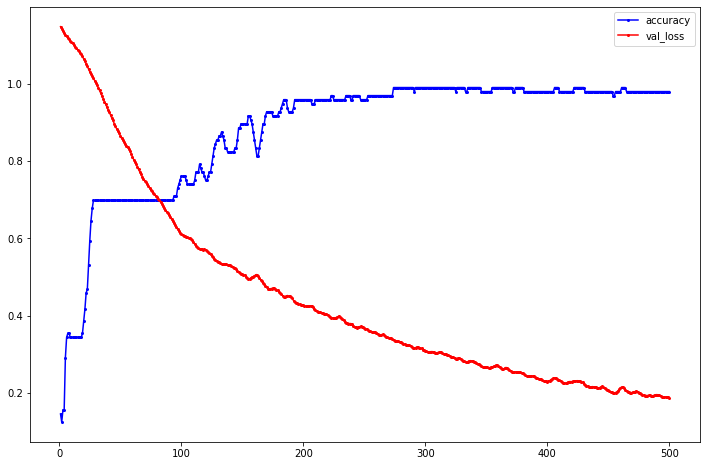

In [17]:
plt.figure(figsize=(12,8))
plt.plot(x_len, y_acc, 'bo-', label='accuracy', markersize=2)
plt.plot(x_len, y_vloss, 'ro-', label='val_loss', markersize=2)
plt.legend()
plt.show()